# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [47]:
# imports
import panel as pn
pn.extension('plotly')
from panel.interact import interact
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [48]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("map_box_api")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [49]:
# Import the necessary CSVs to Pandas DataFrames

#sfo_data
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")


#housing units per year 
units_per_year = (
    sfo_data['housing_units']
    .groupby(['year'])
    .mean()
    .reset_index()
)


#average gross rent, sale price per year
avg_sale_rent= (
    sfo_data[['sale_price_sqr_foot', 'gross_rent']]
    .groupby(['year'])
    .mean()
)
avg_sale_rent.rename({"sale_price_sqr_foot": "Sale Price Per Square Foot", 
           "gross_rent": "Gross Rent"}, 
          axis = "columns", inplace = True)


#average price by neighborhood
price_neighborhood = sfo_data[['sale_price_sqr_foot','gross_rent','neighborhood']].groupby(['year','neighborhood']).mean()
price_neighborhood.rename({"sale_price_sqr_foot": "Average Sale Price Per Square Foot", 
           "gross_rent": "Average Gross Rent"}, 
          axis = "columns", inplace = True)

#top 10 most expensive neighborhoods to own a house
most_expensive_hoods = (
    sfo_data[['sale_price_sqr_foot','neighborhood','housing_units','gross_rent']]
    .groupby(['neighborhood'])
    .mean()
    .sort_values('sale_price_sqr_foot',ascending=False)
)
top_expensive_hoods = most_expensive_hoods[:10]

#most expensive neighborhoods rent sales 
group_nbh = sfo_data.groupby(['year','neighborhood']).mean().reset_index()
group_nbh10 = group_nbh[:10]


#---------- location coordinates data --->


#locations data for plot
mapbox_file = Path("mapbox_df.csv")
mapbox_df = pd.read_csv(mapbox_file)


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [56]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    plot_1 = px.bar(
        units_per_year,
        x='year', 
        y='housing_units', 
        title='Average Units Sold Per Year'
    )
    return plot_1

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    plot_2 = px.line(
        avg_sale_rent,
        x=avg_sale_rent.index,
        y='Gross Rent',
        title='Average Monthly Rent',
)
    return plot_2



def average_sales_price():
    """Average Sales Price Per Year."""
    plot_3 = px.line(
        avg_sale_rent,
        x=avg_sale_rent.index,
        y='Sale Price Per Square Foot',
        title='Average Sale Price Per Square Foot',
)
    return plot_3


def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    plot_4 = price_neighborhood.hvplot(
        x='year', 
        y='Average Sale Price Per Square Foot', 
        width=600,
        groupby='neighborhood'
)
    return plot_4


def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    plot_5 = px.bar(
        top_expensive_hoods,
        x=top_expensive_hoods.index,
        y='sale_price_sqr_foot',
        title='10 most expensive neighborhoods by average sale price per square foot',
)
    return plot_5


def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    plot_6 = group_nbh.hvplot.bar(
        'year',
        ['gross_rent','sale_price_sqr_foot'], 
        xlabel='neighborhood', 
        ylabel='Num. Housing Units', 
        groupby='neighborhood',
        height=500,
        rot=90
)
    return plot_6
 

def neighborhood_map():
    mapbox_plot = px.scatter_mapbox(
        mapbox_df,
        lat="Lat",
        lon="Lon",
        size="sale_price_sqr_foot",
        color="gross_rent",
        hover_name="neighborhood",
        hover_data=["housing_units"],
        zoom=9,
        width=1000,
        height=600,
        title="San Fransisco Housing Costs: Average Sale Price and Gross Rent",
#         color_continuous_scale=px.colors.cyclical.IceFire
)
    return mapbox_plot


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [57]:
# Create a Title for the Dashboard
row1 = pn.Row(housing_units_per_year(), average_sales_price())
row2 = pn.Row(average_price_by_neighborhood(), top_most_expensive_neighborhoods())
row3 = pn.Row(most_expensive_neighborhoods_rent_sales())
row4 = pn.Row(neighborhood_map())


# Create a tab layout for the dashboard
tab1 = pn.Column("## San Fransisco Housing", row1)
tab2 = pn.Column("## Price by Neighborhood", row2, row3)
tab3 = pn.Column("## Neighborhood Map", row4)



# Create the dashboard
dashboard = pn.Tabs(
    ("Housing Data", tab1),
    ("Neighborhood Pricing", tab2),
    ("Gerographical", tab3)
)
dashboard

Traceback (most recent call last):
 File "/Users/poppinfresch/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/pyviz_comms/__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "/Users/poppinfresch/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/panel/viewable.py", line 273, in _on_msg
 doc.unhold()
 File "/Users/poppinfresch/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/bokeh/document/document.py", line 669, in unhold
 self._trigger_on_change(event)
 File "/Users/poppinfresch/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/bokeh/document/document.py", line 1180, in _trigger_on_change
 self._with_self_as_curdoc(event.callback_invoker)
 File "/Users/poppinfresch/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/bokeh/document/document.py", line 1198, in _with_self_as_curdoc
 return f()
 File "/Users/poppinfresch/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/bokeh/util/callback_manager.py", line 161, in invoke
 callback(attr, old, new)
 File "/Users/poppinfresch/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/panel/reactive.py", line 301, in _comm_change
 self._process_events({attr: new})
 File "/Users/poppinfresch/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/panel/reactive.py", line 262, in _process_events
 self.param.set_param(**self_events)
 File "/Users/poppinfresch/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/param/parameterized.py", line 1526, in set_param
 self_._batch_call_watchers()
 File "/Users/poppinfresch/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/param/parameterized.py", line 1665, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "/Users/poppinfresch/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/param/parameterized.py", line 1627, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "/Users/poppinfresch/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/param/parameterized.py", line 520, in caller
 return function()
 File "/Users/poppinfresch/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/param/parameterized.py", line 351, in _depends
 return func(*args,**kw)
 File "/Users/poppinfresch/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/panel/pane/plotly.py", line 153, in _update_figure_layout
 self._figure.plotly_relayout(self.relayout_data)
 File "/Users/poppinfresch/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/plotly/basedatatypes.py", line 2601, in plotly_relayout
 relayout_changes = self._perform_plotly_relayout(relayout_data)
 File "/Users/poppinfresch/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/plotly/basedatatypes.py", line 2641, in _perform_plotly_relayout
 key_path_str=key_path_str
ValueError: 
Invalid property path 'mapbox._derived' for layout

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
            [1] Plotly(Figure, visible=False)
        [2] Row
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
    [2] Column
        [0] Markdown(str)
        [1] Row
            [0] Plotly(Figure, visible=False)

## Serve the Panel Dashboard

In [58]:
# Serve the# dashboard
pn.serve(dashboard)

Launching server at http://localhost:63155


# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

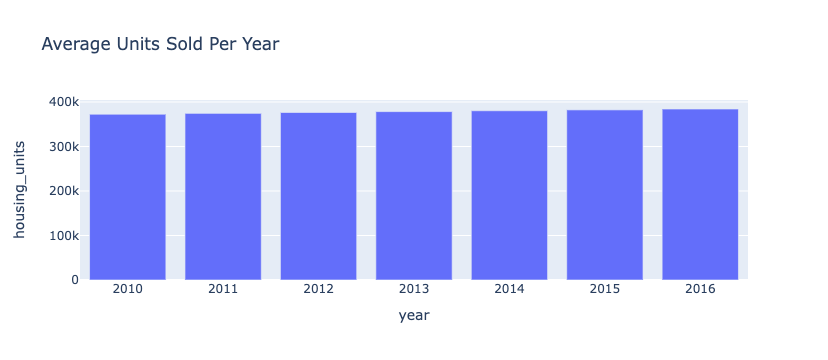

In [39]:
housing_units_per_year()

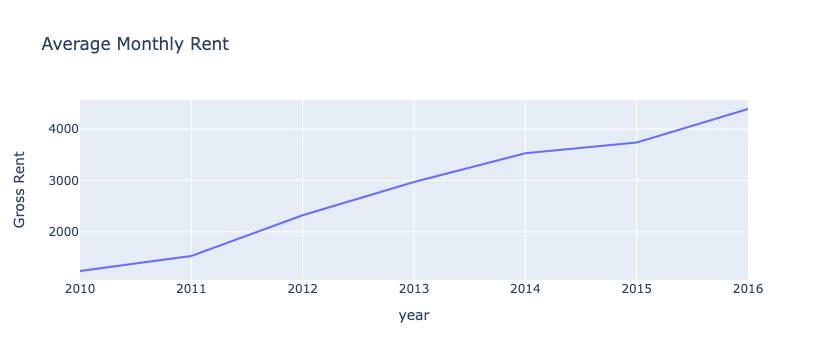

In [40]:
average_gross_rent()

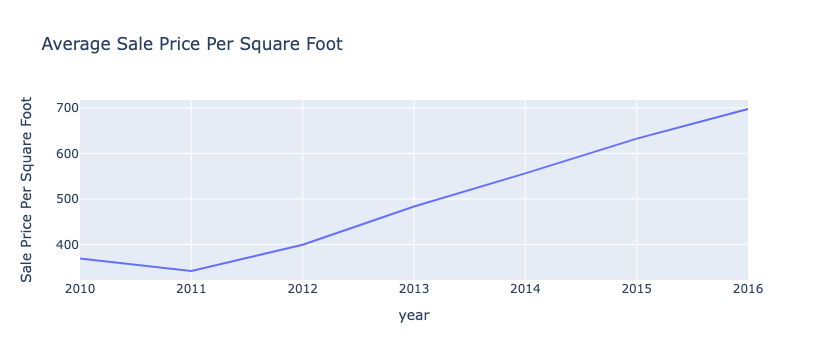

In [41]:
average_sales_price()

In [42]:
average_price_by_neighborhood()

:DynamicMap   [neighborhood]
   :Curve   [year]   (Average Sale Price Per Square Foot)

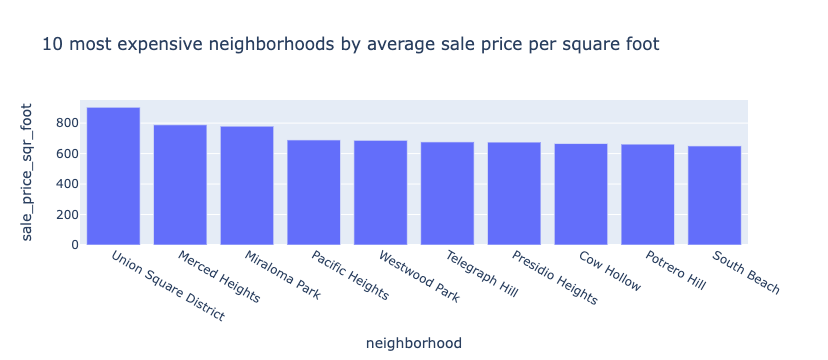

In [43]:
top_most_expensive_neighborhoods()

In [44]:
most_expensive_neighborhoods_rent_sales()

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

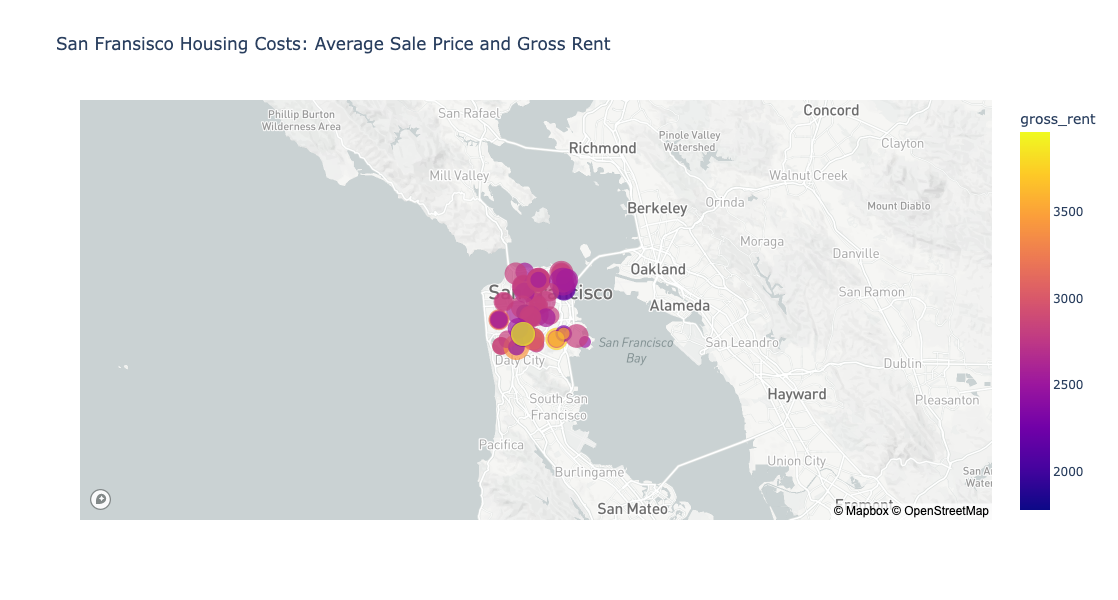

In [59]:
 neighborhood_map()

In [ ]:
# parallel_categories()
#optional challenge

In [ ]:
# parallel_coordinates()
#optional challenge

In [ ]:
# sunburst()
#optional challenge